# Continious Optimization
# Homework 3

## Environment and imports


In [0]:
import os
import sys

import typing as tp

import numpy as np
import scipy as sp
import scipy.optimize

import matplotlib.pyplot as plt

import seaborn as sns
_ = sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Раздел 2.** Градиентный спуск

### **Задача 2.**
Исследовать поведение градиентного спуска с постоянным шагом для функции $f(x) = |x|^{2 + \alpha}$, где $\alpha > 0$ – константа.

#### Boilerplate

In [0]:
class Task2Function:
    def __init__(
        self,
        alpha: float = 0.5,
    ) -> None:
        """
        Make new TaskFunction instance.
        """

        self.alpha = alpha

        return

    def __call__(
        self,
        x: float,
    ) -> float:
        """
        Calculate |x|^{2 + alpha}.
        """

        return np.abs(x) ** (2.0 + self.alpha)

    def gradient(
        self,
        x: float,
    ) -> float:
        """
        Find gradient in a given point x.
        """

        return (self.alpha + 2.0) * x * (np.abs(x) ** self.alpha)
    

In [0]:
class Task2Solver:
    def __init__(
        self,
        f: Task2Function,
    ) -> None:
        """
        Make new Task2Solver instance.
        """

        self.f = f

        return

    def _gradient_step(
        self,
        x: float,
        step: float,
    ) -> float:
        """
        Step in direction of gradient to get a new point.
        """

        return x - step * self.f.gradient(x)

    def gradient_descent(
        self,
        x_0: float = 1.11,
        step: float = 0.001,
        iteration_count: int = 1000,
    ) -> tp.Tuple[tp.List[float], tp.List[float]]:
        """
        Try to find minimum of a function.
        """

        x_history: tp.List[float] = [x_0]
        y_history: tp.List[float] = [self.f(x_0)]

        x: float = x_0

        for _ in range(iteration_count):
            x = self._gradient_step(x, step)

            x_history.append(x)
            y_history.append(self.f(x))

        return x_history, y_history

In [0]:
def plot_task2_convergence():
    starting_points = [
        -1.0, 4.0, -100.0, 
        75.0, -10000.0, 2300.,           
    ]
    steps = [
        0.01,
        0.005,
        0.0025,
    ]

    figure, axis = plt.subplots(
        nrows=len(starting_points),
        ncols=len(steps),
        figsize=(20, 20),
    )

    for row, x_0 in enumerate(starting_points):
        for column, step in enumerate(steps):
            solver = Task2Solver(Task2Function())
            x, y = solver.gradient_descent(x_0, step)
            converged = "not converged" if np.abs(y[-1] - 0.0) > 0.001 else "converged"

            ax = axis[row, column]
            _ = sns.scatterplot(x, y, ax=ax)
            _ = sns.lineplot(x, y, ax=ax)
            ax.set_title(f"x_0 = {x_0} | step = {step} | {converged}")

    figure.subplots_adjust(hspace=0.8)
    plt.show()

#### Result

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars


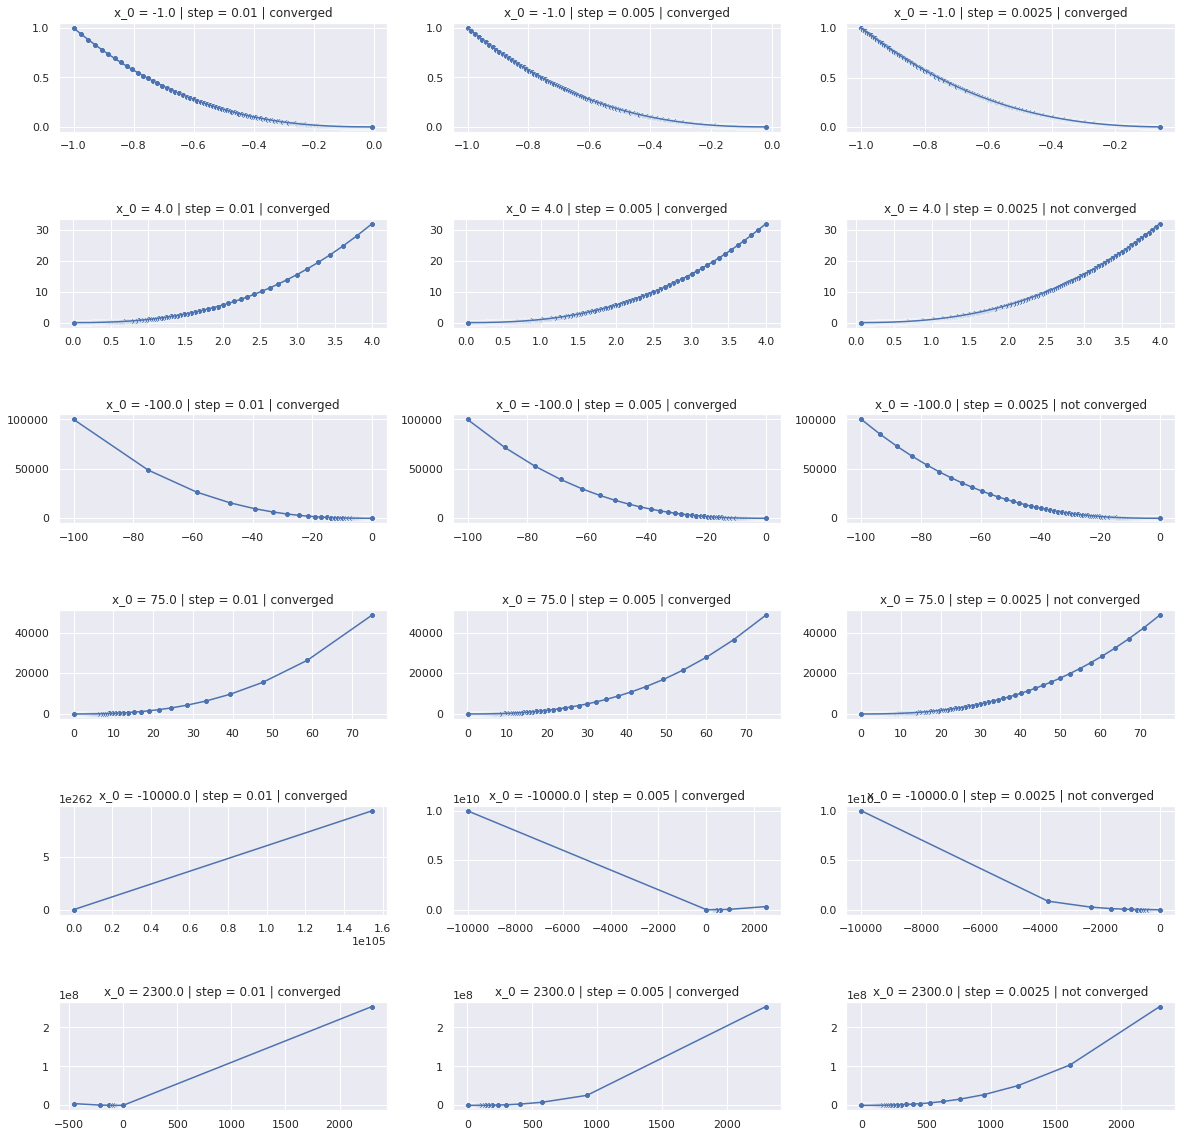

In [0]:
plot_task2_convergence()

**Комментарий**: по графикам видно, что сходимость зависит от всех параметров сразу. Если правильно подобрать длину шага, то старт из большинства точек способен дать сходимость.
Прямой зависимости от одного из параметров (стартовая точка или же длина шага) нет, для достижения наилучших результатов их нужно регулировать одновременно.

### **Задача 3.**
Исследовать поведение градиентного спуска для функций 
1. $f_1(x) = f_1(x, y) = (x - 5)^2 + (y + 2)^2$
2. $f_2(x, y) = (1 - (y - 4))^2 + 35 ((x + 6) - (y - 4)^2)^2$

#### Boilerplate

In [0]:
class Task3Function1:
    def __call__(
        self,
        x: float,
        y: float,
    ) -> float:
        """
        Calculate f_1(x, y) = (x - 5)^2 + (y + 2)^2
        """

        return (x - 5) ** 2 + (y + 2) ** 2

    def gradient(
        self,
        x: float,
        y: float,
    ) -> tp.Tuple[float, float]:
        """
        Find gradient in a given point (x, y).
        """

        return (
            2 * (x - 5),
            2 * (y + 2),
        )


class Task3Function2:
    def __call__(
        self,
        x: float,
        y: float,
    ) -> float:
        """
        Calculate f_2(x, y) = (1 - (y - 4))^2 + 35 ((x + 6) - (y - 4)^2)^2
        """

        return (1 - (y - 4)) ** 2 + 35 * (x + 6 - (y - 4) ** 2) ** 2

    def gradient(
        self,
        x: float,
        y: float,
    ) -> tp.Tuple[float, float]:
        """
        Find gradient in a given point (x, y).
        """

        return (
            70 * (x - (y - 4) ** 2 + 6),
            2 * (-70 * (y - 4) * (x - (y - 4) ** 2 + 6) + y - 5),
        )

In [0]:
class Task3Solver:
    def __init__(
        self,
        f: tp.Union[Task3Function1, Task3Function2],
    ) -> None:
        """
        Make new Task3Solver instance.
        """

        self.f = f

        return

    def _update_step(
        self,
        step: float,
        iteration: int,
    ) -> float:
        """
        Update step using apriori method.
        """

        return step / np.sqrt(iteration + 1)

    def _gradient_step(
        self,
        x: float,
        y: float,
        step: float,
    ) -> tp.Tuple[float, float]:
        """
        Step in direction of function's gradient to get a new point.
        """

        grad_x, grad_y = self.f.gradient(x, y)

        return (
            x - step * grad_x,
            y - step * grad_y,
        )

    def _gradient_descent_iter(
        self,
        x_0: float,
        y_0: float,
        step: float,
        use_apriori_step_update,
        iteration_count,
    ) -> tp.Tuple[tp.List[float], tp.List[float]]:
        """
        Descent using iterative approach.
        """

        x_history: tp.List[float]    = [x_0]
        y_history: tp.List[float]    = [y_0]
        func_history: tp.List[float] = [self.f(x_0, y_0)]

        x: float = x_0
        y: float = y_0
        
        for iteration in range(iteration_count):
            iter_step = step
            if use_apriori_step_update:
                iter_step = self._update_step(iter_step, iteration)

            x, y = self._gradient_step(x, y, iter_step)

            x_history.append(x)
            y_history.append(y)
            func_history.append(self.f(x, y))

        return x_history, y_history, func_history

    def _gradient_descent_func_conv(
        self,
        x_0: float,
        y_0: float,
        step: float,
    ) -> tp.Tuple[tp.List[float], tp.List[float]]:
        """
        Descent based on function convergence.
        """
        
        x_history: tp.List[float]    = [x_0]
        y_history: tp.List[float]    = [y_0]
        func_history: tp.List[float] = [self.f(x_0, y_0)]

        x: float = x_0
        y: float = y_0
        
        while True:
            x, y = self._gradient_step(x, y, step)

            x_history.append(x)
            y_history.append(y)
            func_history.append(self.f(x, y))

            if np.abs(func_history[-2] - func_history[-1]) <= 0.001:
                break

        return x_history, y_history, func_history

    def _gradient_descent_grad_conv(
        self,
        x_0: float,
        y_0: float,
        step: float,
    ) -> tp.Tuple[tp.List[float], tp.List[float]]:
        """
        Descent based on gradient's norm convergence.
        """
        
        x_history: tp.List[float]    = [x_0]
        y_history: tp.List[float]    = [y_0]
        func_history: tp.List[float] = [self.f(x_0, y_0)]

        x: float = x_0
        y: float = y_0
        
        while True:
            x, y = self._gradient_step(x, y, step)

            x_history.append(x)
            y_history.append(y)
            func_history.append(self.f(x, y))

            x_grad, y_grad = self.f.gradient(x, y)
            grad_norm = np.sqrt(x_grad ** 2 + y_grad ** 2)
            if grad_norm <= 0.001:
                break

        return x_history, y_history, func_history

    def gradient_descent(
        self,
        x_0: float = 1.11,
        y_0: float = 2.22,
        step: float = 0.005,
        use_apriori_step_update: bool = False,
        stopping_criteria: tp.Optional[str] = None,
        iteration_count: int = 1000,
    ) -> tp.Tuple[tp.List[float], tp.List[float]]:
        """
        Try to find minimum of a function.
        """

        if stopping_criteria is None:
            return self._gradient_descent_iter(x_0, y_0, step, use_apriori_step_update, iteration_count)

        if stopping_criteria == "functional_convergence":
            return self._gradient_descent_func_conv(x_0, y_0, step)

        if stopping_criteria == "gradient_convergence":
            return self._gradient_descent_grad_conv(x_0, y_0, step)

        raise RuntimeError("Unknown stopping criteria")


In [0]:
def plot_step_method_diff(ctx, func, step=0.1):
    figure, axis = plt.subplots(
        nrows=2,
        ncols=len(ctx["starting_points"]),
        figsize=(40, 10),
    )

    for row, use_apriori_step_update in enumerate([False, True]):
        for column, starting_point in enumerate(ctx["starting_points"]):
            solver = Task3Solver(func)
            x_history, y_history, func_history = solver.gradient_descent(
                x_0=starting_point[0],
                y_0=starting_point[1],
                step=step,
                use_apriori_step_update=use_apriori_step_update,
                iteration_count=200,
            )

            ax = axis[row, column]
            contour = ax.contour(ctx["X"], ctx["Y"], ctx["Z"], levels=np.logspace(0, 1.5, num=15), cmap=plt.cm.rainbow_r)
            ax.plot(x_history, y_history, zorder=5)
            ax.scatter(x_history, y_history, zorder=6)
            ax.scatter(ctx["x_min"], ctx["y_min"], c="r", zorder=7)

    for ax, row in zip(axis[:, 0], ["Constant step", "Apriori step update"]):
        ax.set_ylabel(row, rotation=90, size="large")

    _ = plt.show()

In [0]:
def plot_stopping_criteria_diff(ctx, func, step=0.2):
    figure, axis = plt.subplots(
        nrows=2,
        ncols=len(ctx["starting_points"]),
        figsize=(40, 10),
    )

    for row, stopping_criteria in enumerate(["functional_convergence", "gradient_convergence"]):
        for column, starting_point in enumerate(starting_points):
            solver = Task3Solver(func)
            x_history, y_history, func_history = solver.gradient_descent(
                x_0=starting_point[0],
                y_0=starting_point[1],
                step=step,
                stopping_criteria=stopping_criteria,
            )

            ax = axis[row, column]
            contour = ax.contour(ctx["X"], ctx["Y"], ctx["Z"], levels=np.logspace(0, 1.5, num=15), cmap=plt.cm.rainbow_r)
            ax.plot(x_history, y_history, zorder=5)
            ax.scatter(x_history, y_history, zorder=6)
            ax.scatter(ctx["x_min"], ctx["y_min"], c="r", zorder=7)

    for ax, row in zip(axis[:, 0], ["Functional convergence", "Gradient convergence"]):
        ax.set_ylabel(row, rotation=90, size="large")

    _ = plt.show()

In [0]:
def plot_convergence(ctx, func, step=0.01):
    x_min, y_min = ctx["x_min"], ctx["y_min"]
    actual_minimum = func(x_min, y_min)
    
    loss_history = []

    for iteration_count in ctx["iteration_counts"]:
        solver = Task3Solver(func)
        x_history, y_history, func_history = solver.gradient_descent(
            x_0=100,
            y_0=100,
            step=step,
            iteration_count=iteration_count,
        )
        loss_history.append(np.abs(actual_minimum - func_history[-1]))

    ax = sns.lineplot(
        x=ctx["iteration_counts"],
        y=loss_history,
    )
    ax.set(xlabel="Number of iterations", ylabel="Convergence")

#### Function1

#### Context

In [0]:
X, Y = np.linspace(-2, 12, 256), np.linspace(-9, 5, 256)
func = Task3Function1()
f = lambda i, j: func(X[int(i)], Y[int(j)])
Z = np.fromfunction(np.vectorize(f), (len(X), len(Y)))

In [0]:
rng = np.random.default_rng()

starting_point_count = 8
scale = 40
starting_points = np.c_[
    rng.uniform( 5 - scale / 2,  5 + scale / 2, starting_point_count),
    rng.uniform(-2 - scale / 2, -2 + scale / 2, starting_point_count),
]

In [0]:
x_min, y_min = 5, -2
iteration_counts = range(10, 150, 7)

In [0]:
func1_ctx = {
    "X": X,
    "Y": Y,
    "Z": Z,
    "starting_points": starting_points,
    "x_min": x_min,
    "y_min": y_min,
    "iteration_counts": iteration_counts,
}

#### Result

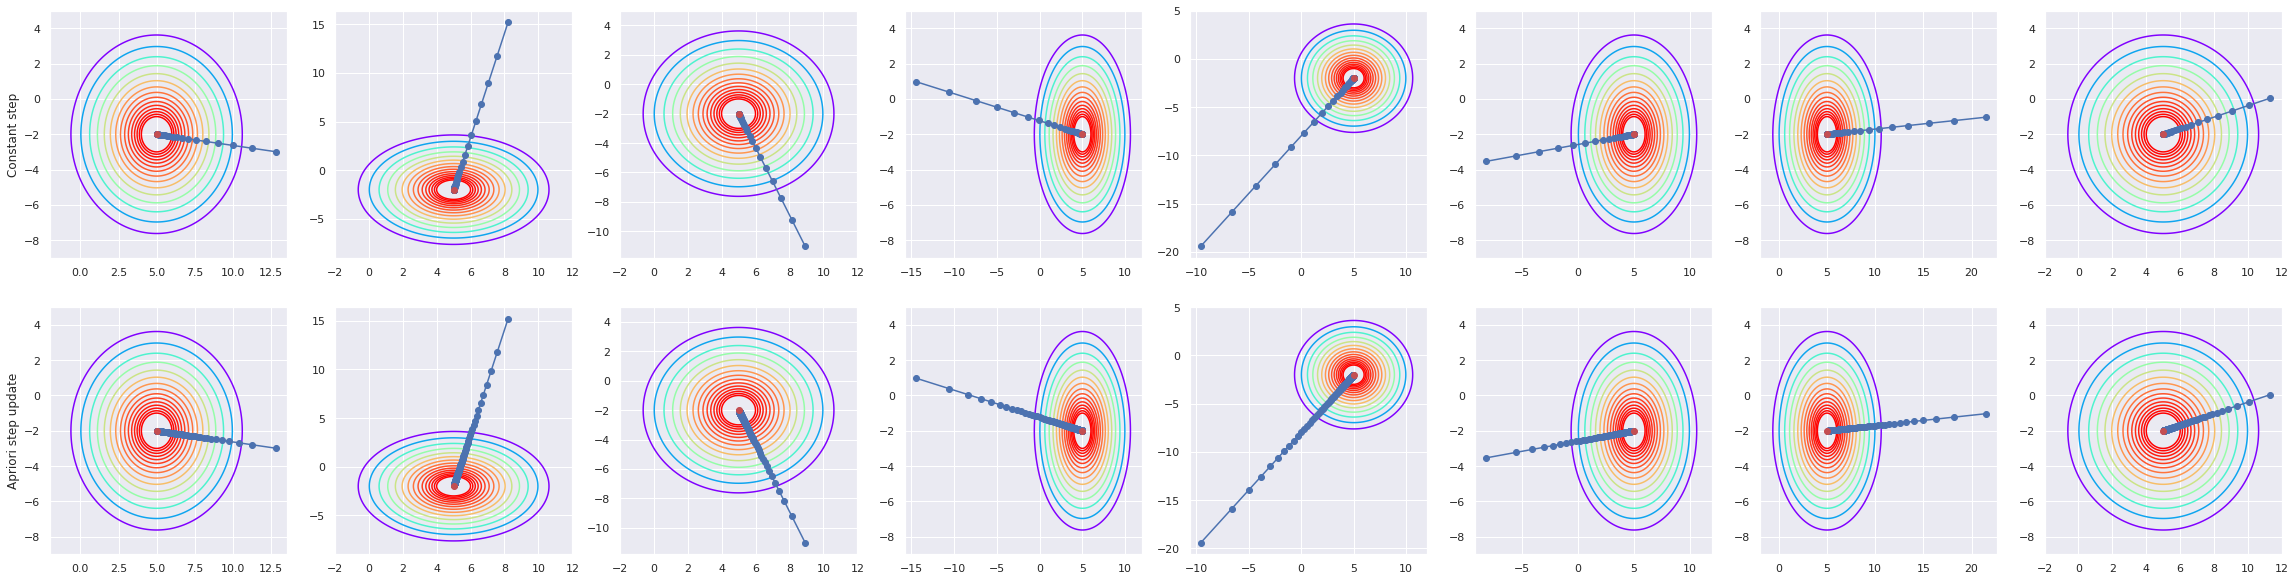

In [0]:
plot_step_method_diff(func1_ctx, Task3Function1())

 **Комментарий**: на графиках выше нарисованы результаты градиентных спусков. Из них видно, что правило априорного выбора шага в данной задаче проигрывает правилу постоянного шага, поэтому дальше будет пользоваться постоянным шагом.

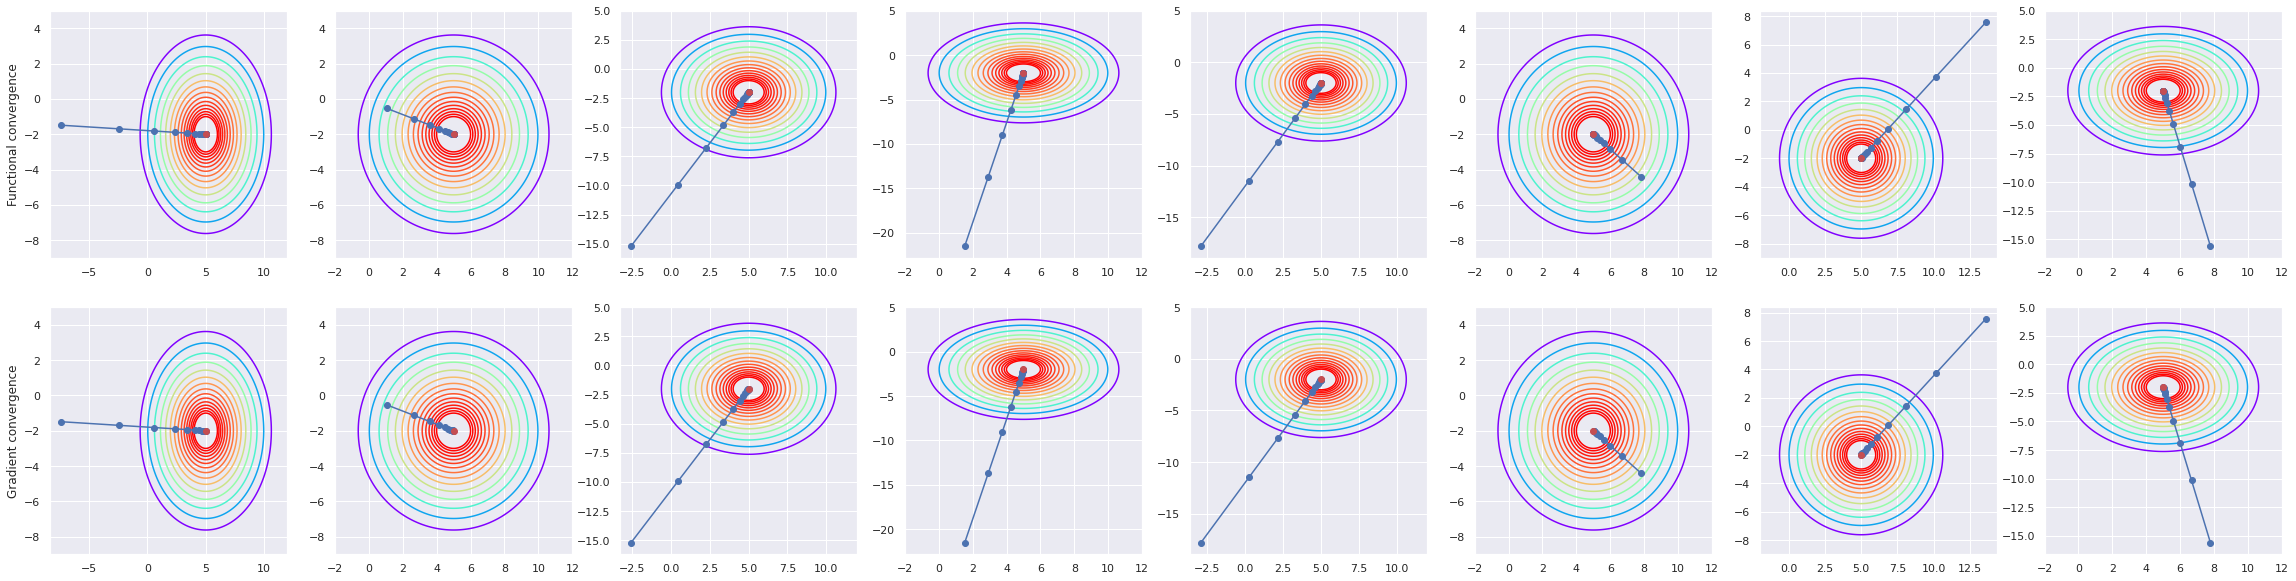

In [0]:
plot_stopping_criteria_diff(func1_ctx, Task3Function1())

**Комментарий**: по графикам видно, что в рамках данной задачи оба критерия остановки (и сходимость по функционалу, и сходимость по норме градиента) дают относительно одинаковые результаты.

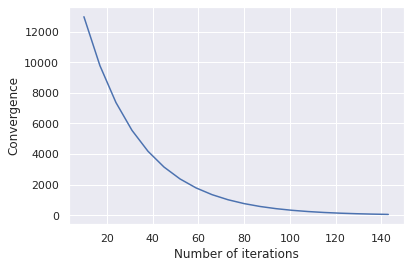

In [0]:
plot_convergence(func1_ctx, Task3Function1())

**Комментарий**: из графика видно, что зависимость сходимости от количества итераций в данной задаче довольно прямая – чем больше итераций, тем ближе к минимуму.

#### Function2

#### Context

In [0]:
X, Y = np.linspace(-12, 2, 256), np.linspace(-2, 12, 256)
func = Task3Function2()
f = lambda i, j: func(X[int(i)], Y[int(j)])
Z = np.fromfunction(np.vectorize(f), (len(X), len(Y)))

In [0]:
x_min, y_min = -5, 5
iteration_counts = range(10, 150, 7)

In [0]:
rng = np.random.default_rng()

starting_point_count = 4
scale = 10
starting_points = np.c_[
    rng.uniform(-5 - scale / 2, -5 + scale / 2, starting_point_count),
    rng.uniform( 5 - scale / 2,  5 + scale / 2, starting_point_count),
]

In [0]:
func2_ctx = {
    "X": X,
    "Y": Y,
    "Z": Z,
    "starting_points": starting_points,
    "x_min": x_min,
    "y_min": y_min,
    "iteration_counts": iteration_counts,
}

#### Result

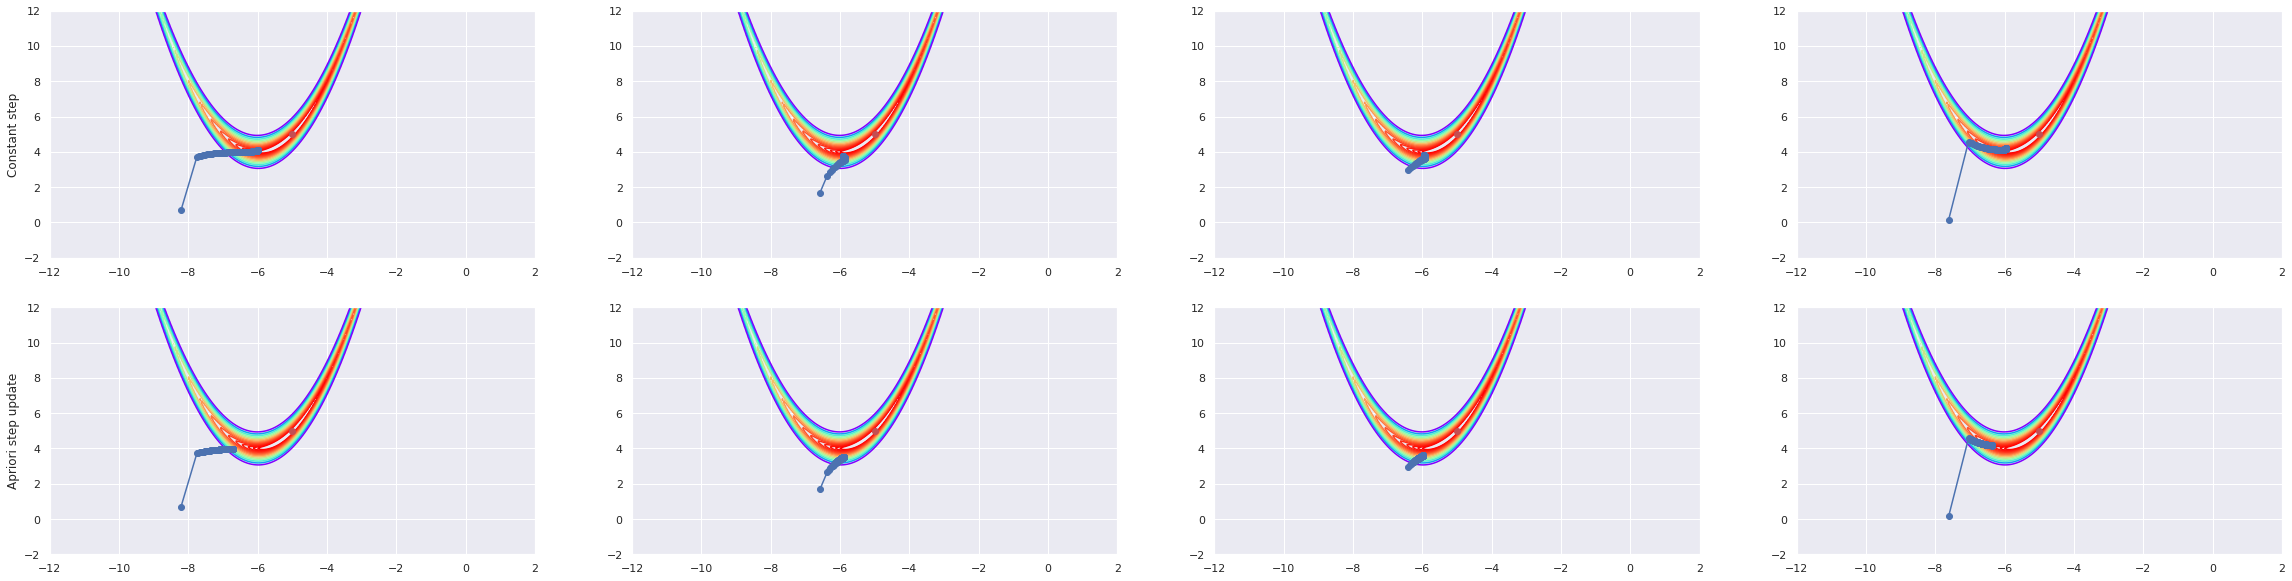

In [0]:
plot_step_method_diff(func2_ctx, Task3Function2(), step=0.0005)

**Комментарий**: в рамках данной задачи метод априорного выбора шага опять-такие показывает себя хуже по сравнению с константным.

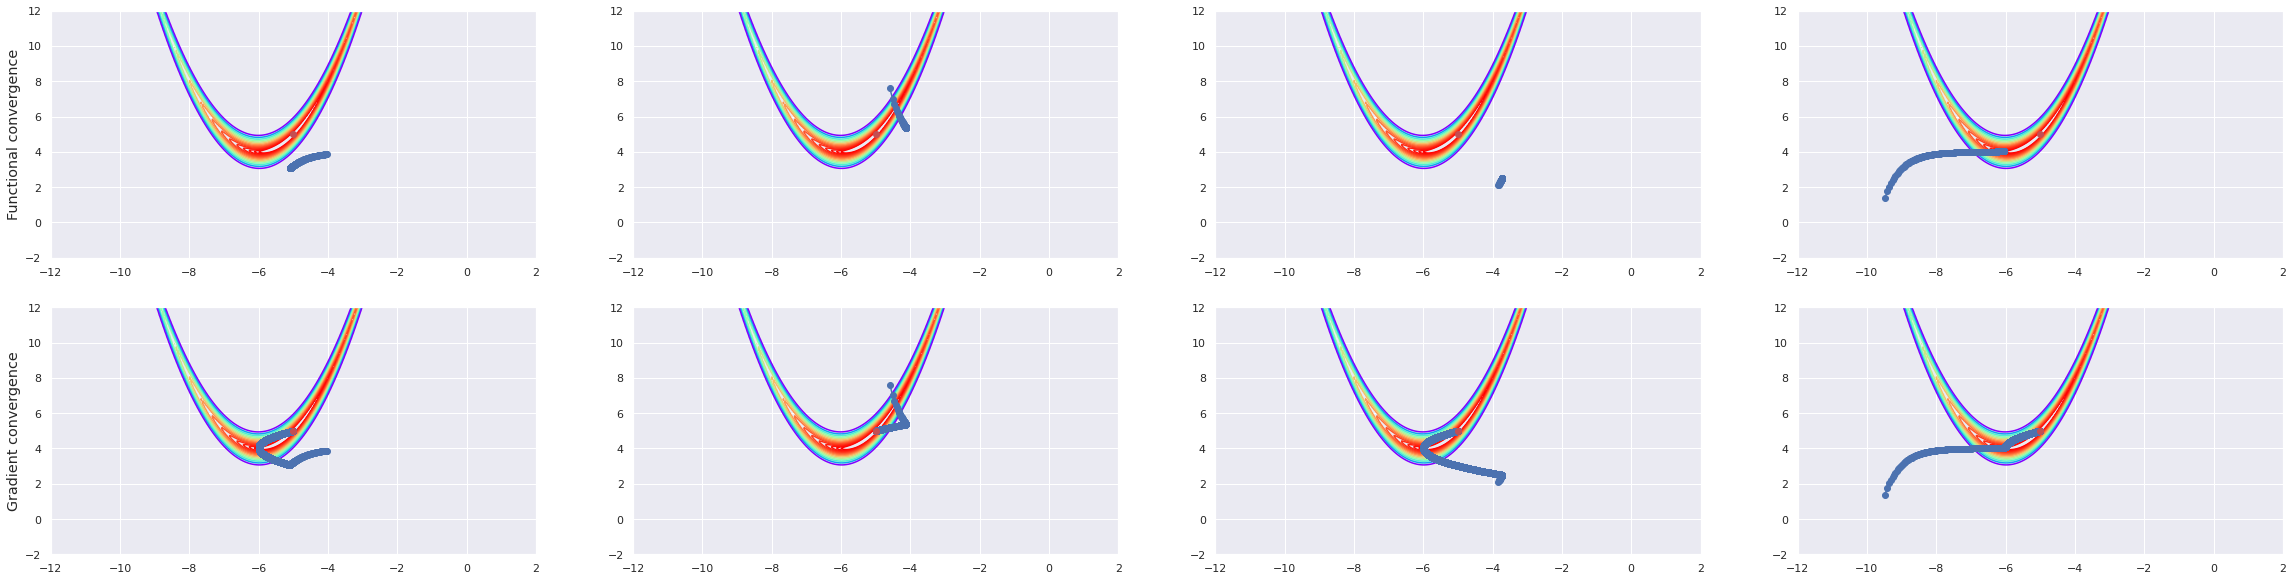

In [0]:
plot_stopping_criteria_diff(func2_ctx, Task3Function2(), step=0.0001)

**Комментарий**: для данной функции критерий сходимости по норме градиента позволяет достичь глобального минимума (в отличие от сходимости по значению функционала).

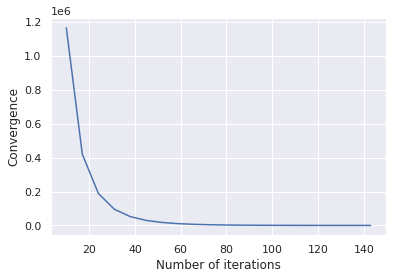

In [0]:
plot_convergence(func2_ctx, Task3Function2(), step=0.000001)

**Комментарий**: как можно видеть, результат абсолютно ожидаемый – чем больше итераций, тем лучше сходимость.

### **Задача 4.**

#### Boilerplate

In [0]:
def generate_matrix_and_bias(
    dim: int = 2, 
    low: int = 1.0, 
    high: int = 10.0,
) -> tp.Tuple[np.ndarray, np.ndarray]:
    """
    Generate matrix A and bias b for quadratic function f(x) = 1/2 <Ax, x> - <b, x>.
    """

    rng = np.random.default_rng()

    matrix = rng.integers(low=low, high=high, size=(dim, dim))
    bias = rng.integers(low=low, high=high, size=dim)

    return matrix, bias

In [0]:
matrix, bias = generate_matrix_and_bias()
cond = np.linalg.cond(matrix)
print(matrix, bias, cond, sep="\n")

[[3 4]
 [7 9]]
[5 3]
154.9935481185379


In [0]:
matrices = [
    np.array([[1, 8], [1, 6]]),
    np.array([[4, 8], [3, 9]]),
    np.array([[5, 4], [2, 4]]),
    np.array([[3, 4], [7, 9]]),
]

biases = [
    np.array([6, 5]),
    np.array([1, 3]),
    np.array([8, 4]),
    np.array([5, 3]),
]

starting_points = [
    (-100, -200),
    (-5, 10),
    (10, -5),
    (50, -30),
]

In [0]:
def gradient_descent_quadratic(
    matrix: np.ndarray,
    bias: np.ndarray,
    starting_point: tp.Tuple[float, float],
) -> tp.Tuple[tp.List[float], tp.List[float], tp.List[float]]:
    history_x = []
    history_y = []
    history_conv = []

    step = 0.005
    x, y = starting_point

    iteration = 0
    while True:
        grad = (matrix @ np.array([x, y]) - bias) / 2
        x -= step * grad[0]
        y -= step * grad[1]

        history_x.append(x)
        history_y.append(y)
        history_conv.append(np.sqrt(x ** 2 + y ** 2))

        if history_conv[-1] <= 0.001 or iteration > 10000:
            break

        iteration += 1

    return history_x, history_y, history_conv


In [0]:
def plot_gradient_descent_quadratic():
    nrows, ncols = 2, len(matrices)

    figure, axis = plt.subplots(
        nrows=nrows,
        ncols=ncols,
        figsize=(40, 15),
    )

    for i, (matrix, bias, starting_point) in enumerate(zip(matrices, biases, starting_points)):
        history_x, history_y, history_conv = gradient_descent_quadratic(matrix, bias, starting_point)

        cond = np.linalg.cond(matrix)
        min_point = np.array([history_x[-1], history_y[-1]])

        ax = axis[0, i]

        scale = 20
        X = np.linspace(min_point[0] - scale, min_point[0] + scale, 256)
        Y = np.linspace(min_point[1] - scale, min_point[1] + scale, 256)
        def f(i, j):
            point = np.array([X[int(i)], Y[int(j)]])
            return (matrix @ point @ point - bias @ point) / 2
        Z = np.fromfunction(np.vectorize(f), (len(X), len(Y)))
        contour = ax.contour(X, Y, Z, levels=np.logspace(0, 2.5, num=15), cmap=plt.cm.rainbow_r)

        ax.plot(history_x, history_y, zorder=5)
        ax.scatter(history_x[::50], history_y[::50], zorder=6)
        ax.scatter(min_point[0], min_point[1], c="r", zorder=7)

        ax = axis[1, i]
        sns.lineplot(
            x=range(len(history_x)),
            y=history_conv,
            ax=ax,
        )
        ax.set_title(f"Condition number = {cond}")

    for ax, row in zip(axis[:, 0], ["Trajectory and function levels", "Gradient convergence"]):
        ax.set_ylabel(row, rotation=90, size="large")


#### Result

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: No contour levels were found within the data range.


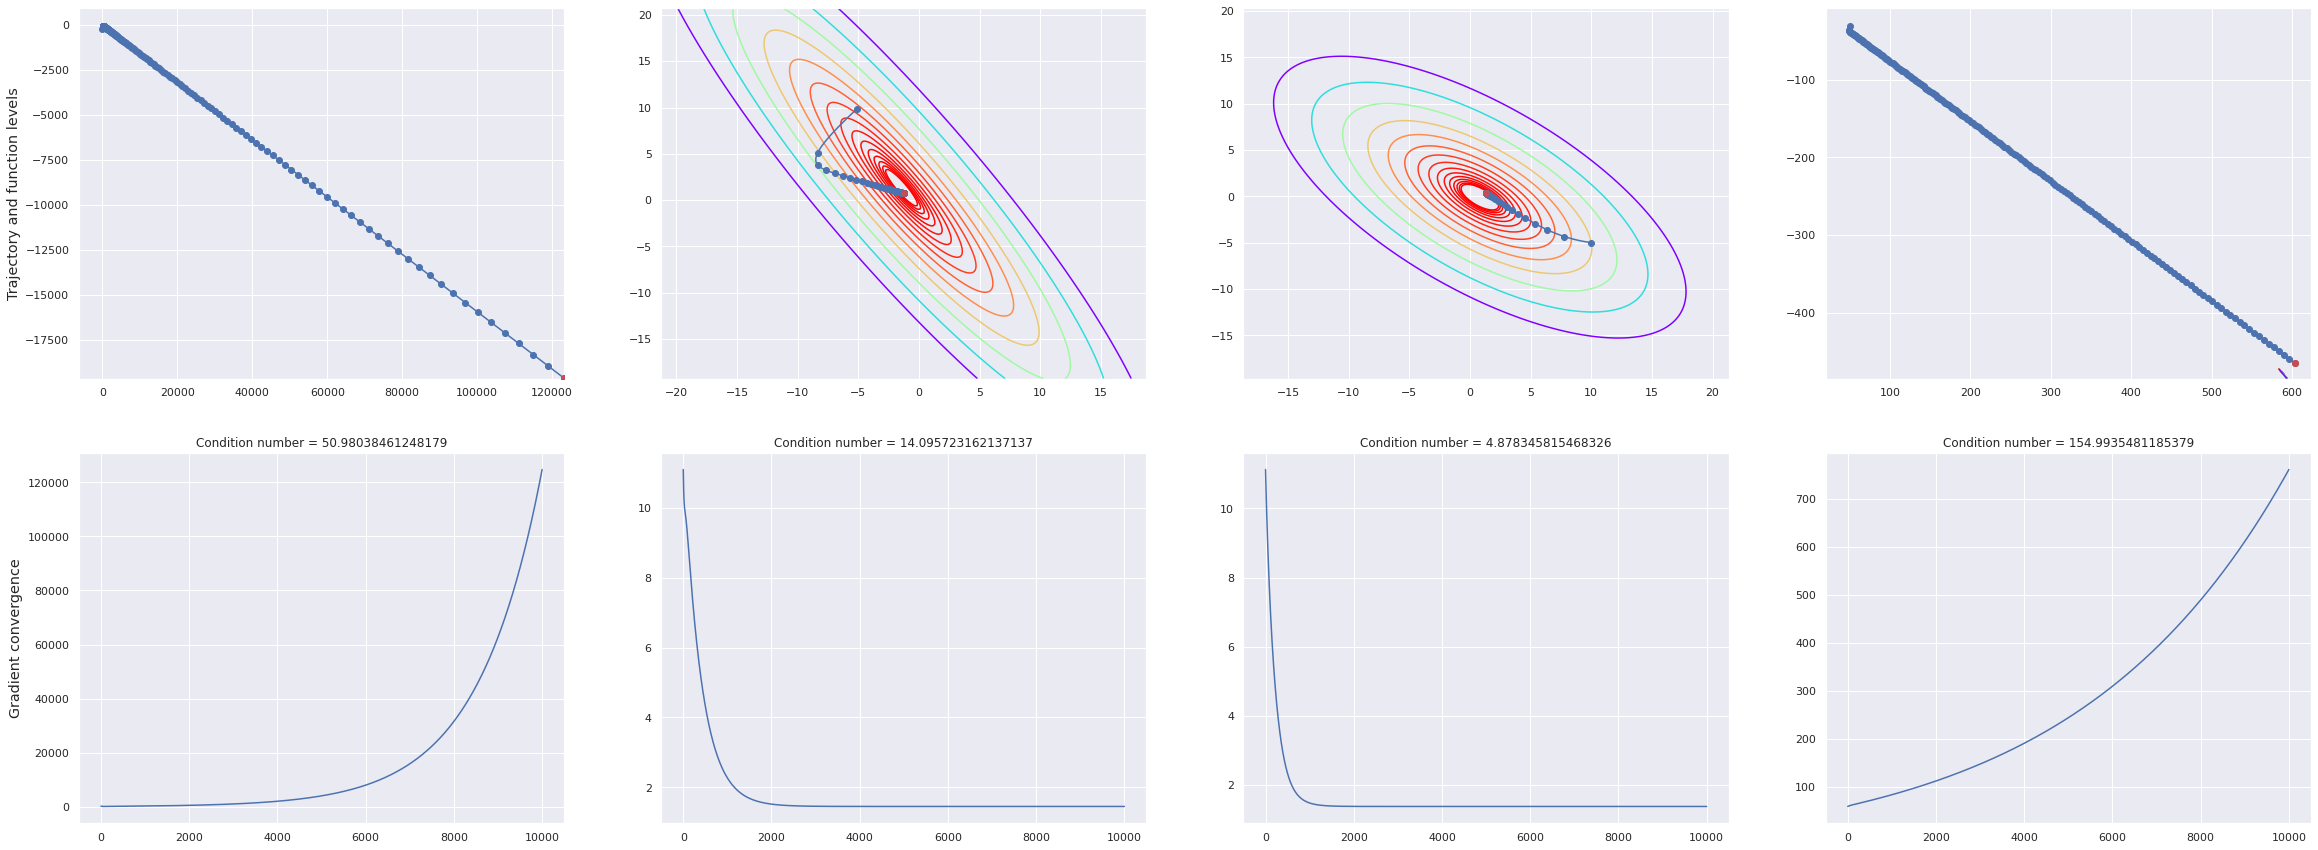

In [0]:
plot_gradient_descent_quadratic()

**Комментарий**: как может быть видно из графиков, градиентный спуск не смог найти минимум для крайних функций. Но это неспроста – Вольфрам также не смог найти глобальный минимум для них, в отличие от двух посередине. Таким образом, мы можем сделать эмпирический вывод: при росте числа обусловленности сложнее найти минимум / меньше вероятность существования минимума.

## **Раздел 3.** Метод Ньютона

### **Задача 1.**

#### Boilerplate

In [0]:
class Task1Function:
    def __call__(
        self,
        x: float,
    ) -> float:
        """
        Compute f(x) = ln(e^x + e^(-x)).
        """
        return np.log(np.exp(x) + np.exp(-x))

    def grad(
        self,
        x: float,
    ) -> float:
        """
        Compute grad f(x) = (e^(2x) - 1) / (e^(2x) + 1).
        """

        return (np.exp(2 * x) - 1) / (np.exp(2 * x) + 1)

    def hess(
        self,
        x: float,
    ) -> float:
        """
        Compute hess f(x) = 4 e^(2x) / (1 + e^(2x))^2
        """

        return 4 * np.exp(2 * x) / (1 + np.exp(2 * x)) ** 2

In [0]:
def newton_method(
    starting_point: float = 5.0,
    iteration_count: int = 100,
    alpha: float = 1.0,
    damping: bool = False,
    gamma: float = 0.7,
) -> tp.Tuple[tp.List[float], tp.List[float]]:
    """
    Find function's minimum using Newton Method.
    """

    func = Task1Function()
    x = starting_point

    history_x: tp.List[float] = [float(x)]
    history_y: tp.List[float] = [func(x)]

    iteration: int = 0
    while True:
        x = x - alpha * func.grad(x) / func.hess(x)
        y = func(x)

        update_alpha = damping and func.grad(x) ** 2 > 0.25
        if update_alpha:
            alpha = alpha * gamma

        history_x.append(x)
        history_y.append(y)

        stop = iteration > iteration_count or x ** 2 <= 0.0001
        if stop:
            break

        iteration += 1

    return history_x, history_y

#### Result

Для начала, запустим метод Ньютона для заданной функции из точек 1.0 и 1.1.

In [0]:
%%time

history_x, history_y = newton_method(
    starting_point=1.0,
)

CPU times: user 215 µs, sys: 0 ns, total: 215 µs
Wall time: 221 µs


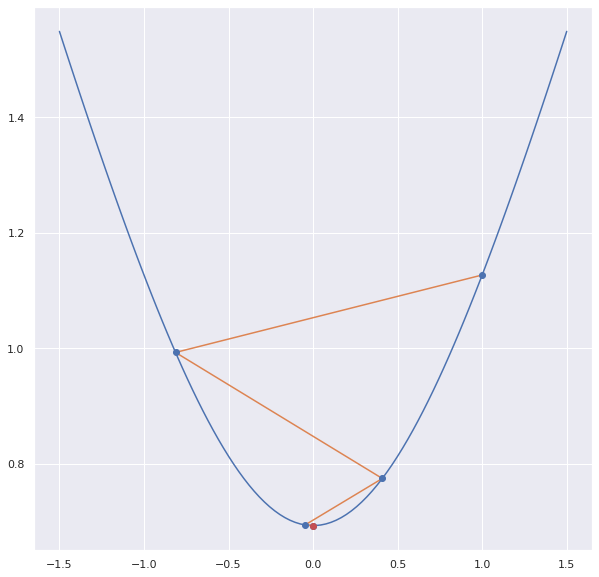

In [0]:
figure = plt.figure(figsize=(10, 10))

x = np.linspace(-1.5, 1.5, 100)
y = np.vectorize(Task1Function())(x)
plt.plot(x, y)

plt.plot(history_x, history_y, zorder=5)
plt.scatter(history_x, history_y, zorder=6)
_ = plt.scatter([0], [np.log(2)], c="r", zorder=7)

In [0]:
%%time

history_x, history_y = newton_method(
    starting_point=1.1,
)

CPU times: user 3.23 ms, sys: 0 ns, total: 3.23 ms
Wall time: 3.08 ms


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars


In [0]:
history_x[:10]

[1.1,
 -1.1285525852679466,
 1.234131133039099,
 -1.6951659799227943,
 5.71536010037962,
 -23021.3564857222,
 inf,
 nan,
 nan,
 nan]

**Комментарий**: итак, мы видим, что в случае, когда начальная точка равна 1.0, методу Ньютона удаётся найти минимум за 5 шагов. Однако, для точки 1.1 это не представляется возможным, так как уже на 6 итерации мы получаем `inf`.

Теперь попробуем демпфированный метод Ньютона.

In [0]:
%%time

history_x, history_y = newton_method(
    starting_point=1.0,
    damping=True,
)

CPU times: user 265 µs, sys: 0 ns, total: 265 µs
Wall time: 272 µs


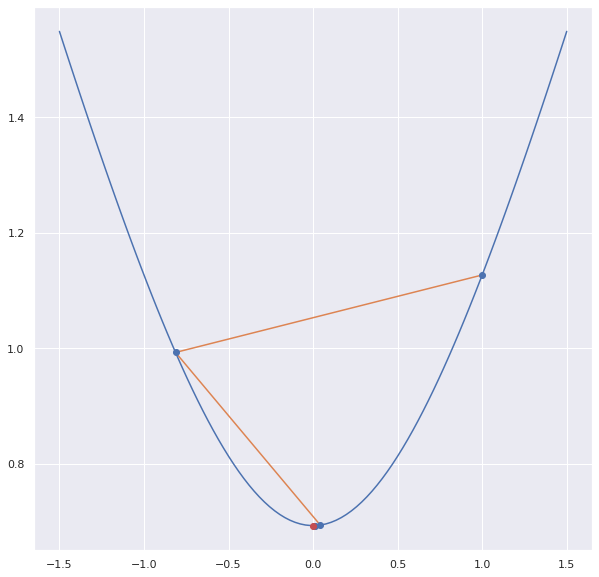

In [0]:
figure = plt.figure(figsize=(10, 10))

x = np.linspace(-1.5, 1.5, 100)
y = np.vectorize(Task1Function())(x)
plt.plot(x, y)

plt.plot(history_x, history_y, zorder=5)
plt.scatter(history_x, history_y, zorder=6)
_ = plt.scatter([0], [np.log(2)], c="r", zorder=7)

In [0]:
%%time

history_x, history_y = newton_method(
    starting_point=1.1,
    damping=True,
)

CPU times: user 157 µs, sys: 0 ns, total: 157 µs
Wall time: 160 µs


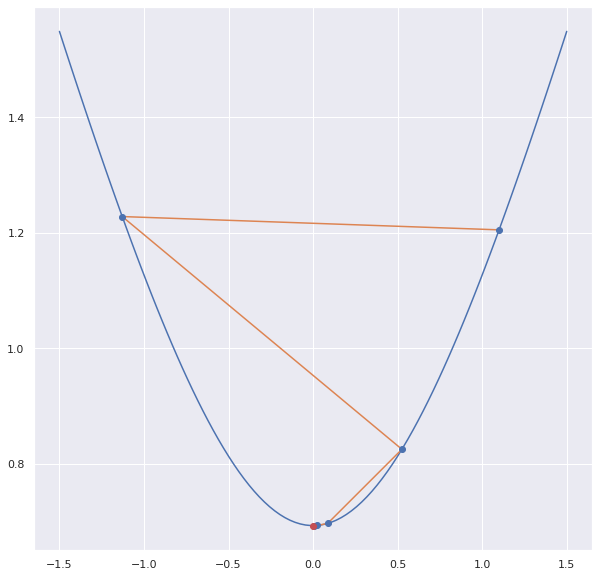

In [0]:
figure = plt.figure(figsize=(10, 10))

x = np.linspace(-1.5, 1.5, 100)
y = np.vectorize(Task1Function())(x)
plt.plot(x, y)

plt.plot(history_x, history_y, zorder=5)
plt.scatter(history_x, history_y, zorder=6)
_ = plt.scatter([0], [np.log(2)], c="r", zorder=7)

**Комментарий**: видно, что демпфированный метод Ньютона позволяет найти минимум для обеих стартовых точек, несмотря на неудачу стандартного подхода.

**Комментарий**: оба метода работают довольно быстро (хотя понятно, что это зависит от задачи и стартовой точки), хотя стандартный метод Ньютона для точки 1.1 вообще может не остановиться.